In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import re

In [14]:
def valid_email(email):
    email_pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    return re.match(email_pattern, email) is not None

In [15]:
def main():

    images = {
    'Traditional': {
        'Benin King Bust': 'C:/Users/2122/Desktop/dikwuegbuCSC418/week-3/Traditional/Benin King Bust.jpg',
        'Benin Queen Bust': 'C:/Users/2122/Desktop/dikwuegbuCSC418/week-3/Traditional/Benin Queen Bust.jpg' 
    },
    'Modern': {
        'Iya Abikun': 'C:/Users/2122/Desktop/dikwuegbuCSC418/week-3/Modern/Iya Abikun.jpg',
        'Red Sky': 'C:/Users/2122/Desktop/dikwuegbuCSC418/week-3/Modern/Red Sky.jpg'
    },
    'Contemporary': {
        'Eti Osa': 'C:/Users/2122/Desktop/dikwuegbuCSC418/week-3/Contemporary/Eti Osa.jpg',
        'Home Bond': 'C:/Users/2122/Desktop/dikwuegbuCSC418/week-3/Contemporary/Home Bond.jpg'
    }
}
    
    email = input("Input email: ")
    age = int(input("Input age: "))
    category = input("Input desired category (Traditional, Modern or Contemporary): ")

    if valid_email(email):
        if age > 18:
            if category in images:
                print(f"Artworks in {category} category:")
                for art_name, art_path in images[category].items():
                    print(art_name, art_path)
                artwork = input("Input name of the desired artwork: ")
                if artwork in images[category]:
                    try:
                        Option = input("Select Enhancement technique: (1) for Blurred, (2) for Cropped, (3) for Translated, (4) for Reflected, (5) for Rotated, (6) for Sheared X or (7) for Sheared Y)")
                        match Option:
                            case "1":
                                image = cv2.imread(art_path)
                                print(art_path)

                                Gaussian = cv2.GaussianBlur(image, (7, 7), 0)
                                plt.figure(figsize=(12, 4))  # Adjust figure size
                                plt.subplot(1, 3, 1)
                                plt.title(f'Guassian {art_name}')
                                plt.imshow(Gaussian)

                                Median = cv2.medianBlur(image,5)
                                plt.subplot(1, 3, 2)
                                plt.title(f'Median {art_name}')
                                plt.imshow(Median)

                                Bilateral = cv2.bilateralFilter(image, 9, 75, 75)
                                plt.subplot(1, 3, 3)
                                plt.title(f'Bilateral {art_name}')
                                plt.imshow(Bilateral)

                                plt.tight_layout()

                            case "2":
                                image = cv2.imread(art_path, 0)
                                print(art_path)
                                plt.subplot(1, 2, 1)
                                plt.title('Original')
                                plt.imshow(image)
                                cropped_img = image[450:700, 200:500]
                                plt.subplot(1, 2, 2)
                                plt.title(f'Cropped {art_name}')
                                plt.imshow(cropped_img)

                            case "3":
                                image = cv2.imread(art_path, 0)
                                print(art_path)
                                rows, cols= image.shape
                                plt.subplot(1, 2, 1)
                                plt.title('Original')
                                plt.imshow(image)
                                M = np.float32([[1, 0, 100], [0, 1, 50]])
                                transl = cv2.warpAffine(image, M, (cols, rows))
                                plt.subplot(1, 2, 2)
                                plt.title(f'Translated {art_name}')
                                plt.imshow(transl)

                            case "4":
                                image = cv2.imread(art_path, 0)
                                print(art_path)
                                plt.subplot(1, 2, 1)
                                plt.title('Original')
                                plt.imshow(image)
                                rows, cols = image.shape
                                M = np.float32([[1, 0, 0], [0, -1, rows], [0, 0, 1]])
                                reflected_img = cv2.warpPerspective(image, M, (int(cols), int(rows)))
                                plt.subplot(1, 2, 2)
                                plt.title(f'Reflected {art_name}')
                                plt.imshow(reflected_img)

                            case "5":
                                image = cv2.imread(art_path, 0)
                                print(art_path)
                                plt.subplot(1, 2, 1)
                                plt.title('Original')
                                plt.imshow(image)
                                rows, cols = image.shape
                                img_rotation = cv2.warpAffine(image, cv2.getRotationMatrix2D((cols/2, rows/2), 30, 0.6), (cols, rows))
                                plt.subplot(1, 2, 2)
                                plt.title(f'Rotated {art_name}')
                                plt.imshow(img_rotation)

                            case "6":
                                image = cv2.imread(art_path, 0)
                                print(art_path)
                                plt.subplot(1, 2, 1)
                                plt.title('Original')
                                plt.imshow(image)
                                rows, cols = image.shape
                                M = np.float32([[1, 0.5, 0], [0, 1, 0],[0, 0, 1]])
                                sheared_imgX = cv2.warpPerspective(image, M, (int(cols*1.5), int(rows*1.5)))
                                plt.subplot(1, 2, 2)
                                plt.title(f'Sheared {art_name}')
                                plt.imshow(sheared_imgX)

                            case "7":
                                image = cv2.imread(art_path, 0)
                                print(art_path)
                                plt.subplot(1, 2, 1)
                                plt.title('Original')
                                plt.imshow(image)
                                rows, cols = image.shape
                                M = np.float32([[1,0,0],[0.5,1,0],[0,0,1]])
                                sheared_imgY = cv2.warpPerspective(image, M, (int(cols*1.5), int(rows*1.5)))
                                plt.subplot(1, 2, 2)
                                plt.title(f'Sheared {art_name}')
                                plt.imshow(sheared_imgY)

                            case _:
                                print("Invalid Selection")
  
                    except Exception as e:
                            print('Error:', e)            
                else:
                    print("Artwork not found in selected category.")
            else:
                print(f"No artworks found in {category} category.")
        else:
            print("Must be 18 or older to view artworks.")
    else:
        print("Invalid email. Please enter valid email address.")

Artworks in Traditional category:
Benin King Bust C:/Users/2122/Desktop/dikwuegbuCSC418/week-3/Traditional/Benin King Bust.jpg
Benin Queen Bust C:/Users/2122/Desktop/dikwuegbuCSC418/week-3/Traditional/Benin Queen Bust.jpg
C:/Users/2122/Desktop/dikwuegbuCSC418/week-3/Traditional/Benin Queen Bust.jpg


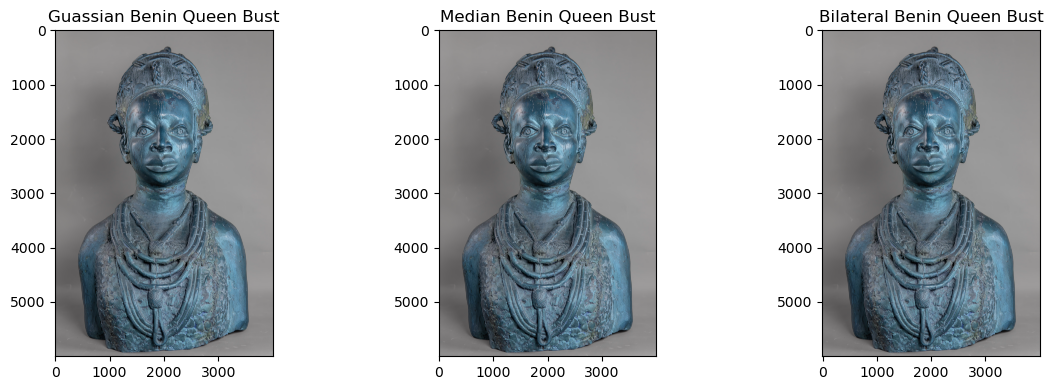

In [16]:
if __name__ == "__main__":
    main()